In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



In [3]:
# 1. Load dataset
df = pd.read_csv("Sample - Superstore.csv.zip", encoding="latin1", parse_dates=["Order Date"])



In [9]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# 2. Clean and prepare
df.dropna(subset=["Order Date", "Sales"], inplace=True)
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
df = df.dropna(subset=["Sales"])



In [5]:
# 3. Set date index
df.set_index("Order Date", inplace=True)



In [6]:
# 4. Resample to monthly sales
monthly_sales = df["Sales"].resample("M").sum()



C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\2929705237.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df["Sales"].resample("M").sum()


In [7]:
# 5. Decompose time series
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)




C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\244133208.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\244133208.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\244133208.py:20: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\244133208.py:20: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nitish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nitish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N

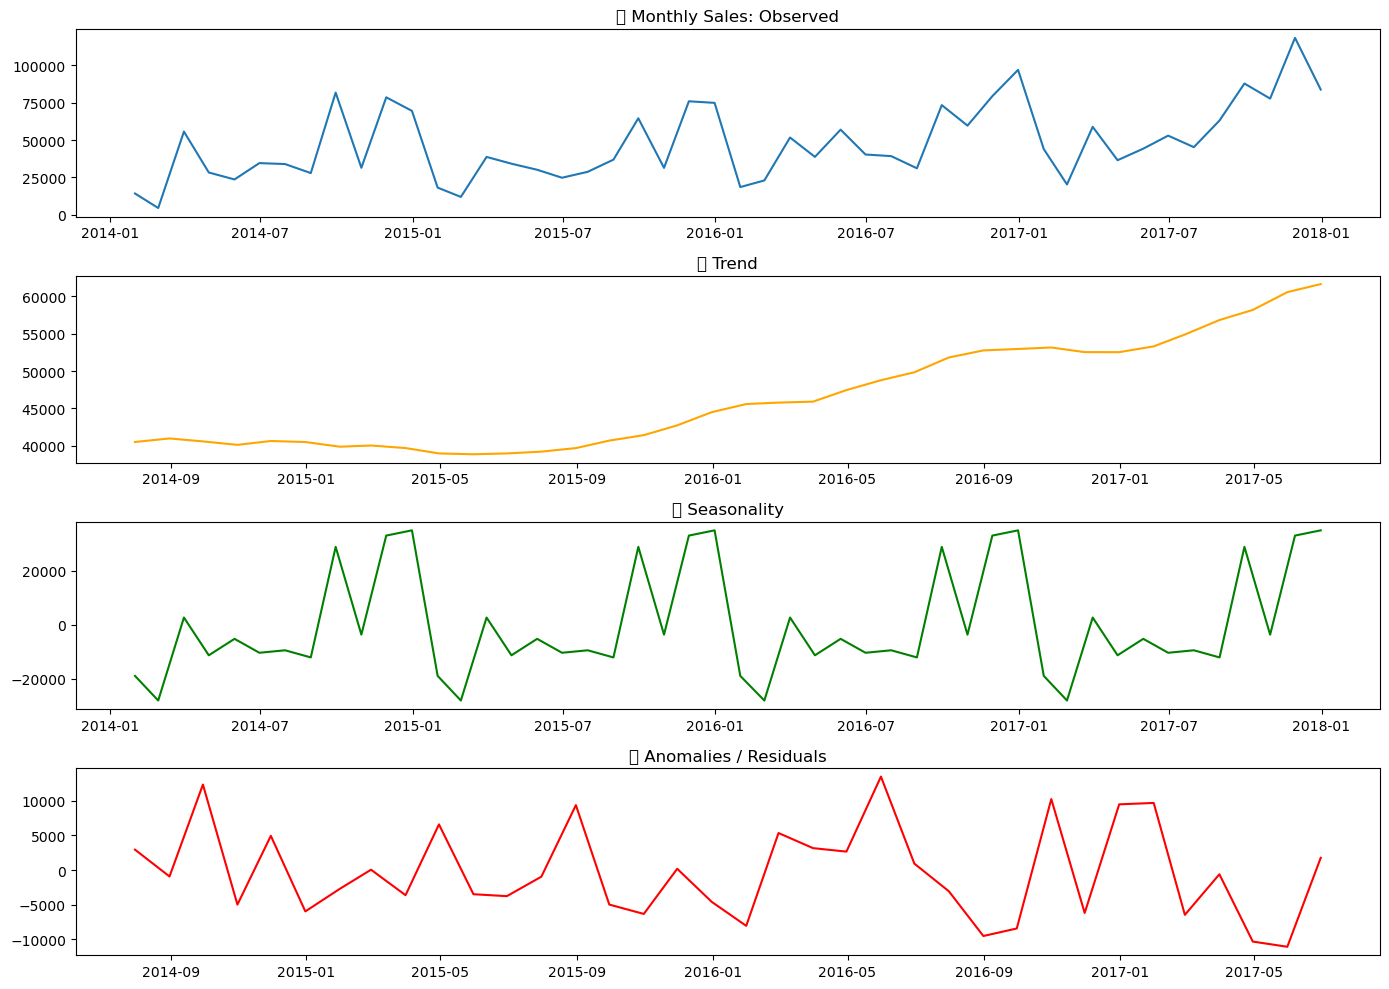

In [8]:
# 6. Plot all components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title("📊 Monthly Sales: Observed")

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title("📈 Trend")

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title("📆 Seasonality")

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title("🚨 Anomalies / Residuals")

plt.tight_layout()
plt.show()

C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\2028361227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
C:\Users\Nitish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


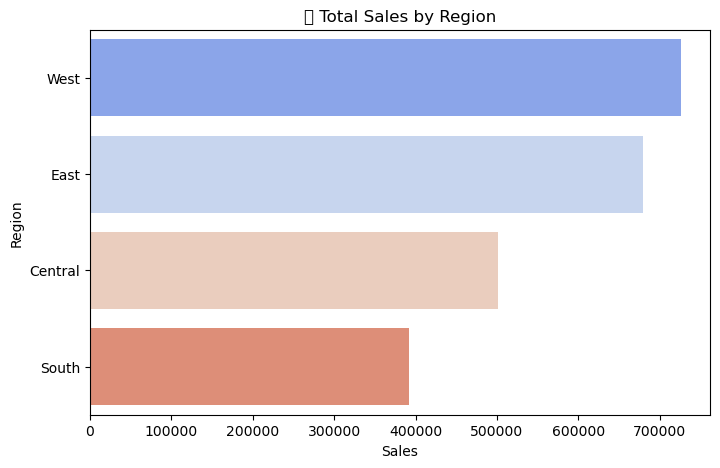

In [10]:
# Total sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title("💼 Total Sales by Region")
plt.xlabel("Sales")
plt.ylabel("Region")
plt.show()


C:\Users\Nitish\AppData\Local\Temp\ipykernel_19616\1463973405.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nitish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nitish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


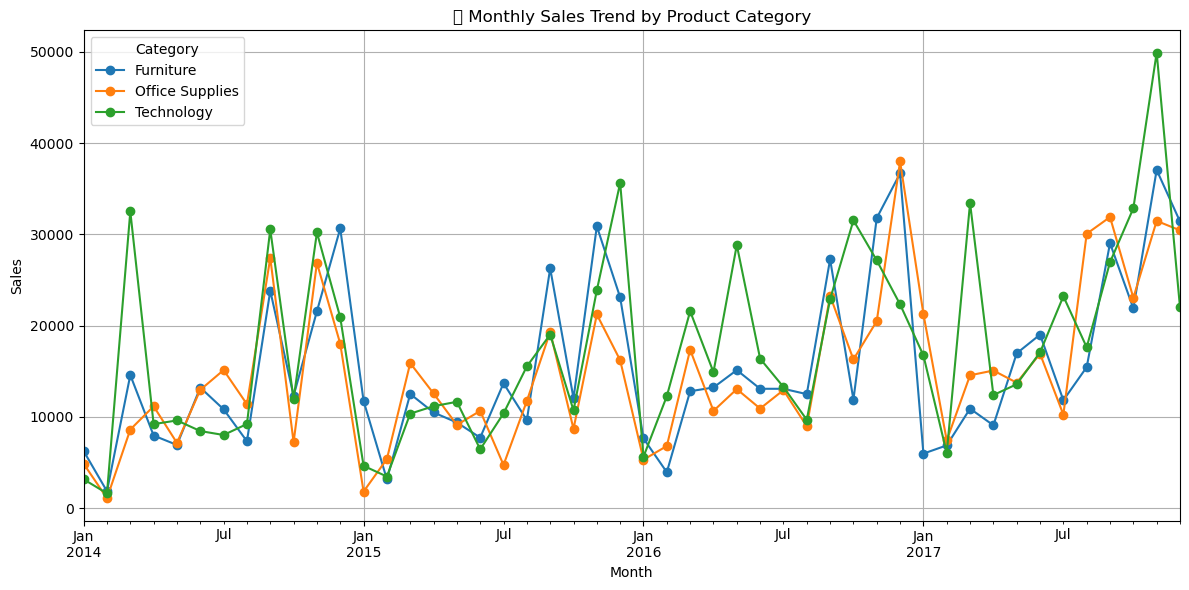

In [11]:
# Reset index if 'Order Date' was set before
df_reset = df.reset_index()

# Convert again to datetime if needed
df_reset['Order Date'] = pd.to_datetime(df_reset['Order Date'])
df_reset['Month'] = df_reset['Order Date'].dt.to_period('M')

# Group monthly sales by category
monthly_category_sales = df_reset.groupby(['Month', 'Category'])['Sales'].sum().unstack()

# Plot
monthly_category_sales.plot(figsize=(12,6), marker='o')
plt.title("📊 Monthly Sales Trend by Product Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
